## Part 1: Data Cleaning

In [145]:
import kagglehub
import os

path = kagglehub.dataset_download("ariyoomotade/netflix-data-cleaning-analysis-and-visualization")
files = os.listdir(path)
print(f"Folder path: {path}")
print(f"File list: {files}")

Folder path: C:\Users\Victor\.cache\kagglehub\datasets\ariyoomotade\netflix-data-cleaning-analysis-and-visualization\versions\1
File list: ['netflix1.csv']


In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
netflix = pd.read_csv(os.path.join(path, files[0]))
netflix

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [148]:
netflix = netflix.replace('Not Given', np.nan)
netflix.isna().sum()

show_id            0
type               0
title              0
director        2588
country          287
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64

In [149]:
netflix = netflix.drop(columns='director', axis=1).dropna()
netflix.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [150]:
netflix['show_id'].duplicated().sum()

np.int64(0)

In [151]:
netflix.dtypes

show_id         object
type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [152]:
netflix['show_id'] = netflix['show_id'].str.removeprefix('s').astype(int)
netflix = netflix.set_index('show_id').sort_index().add_prefix('s', axis=0)
netflix.head()

,type,title,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,9/25/2021,2020,PG-13,90 min,Documentaries
s2,TV Show,Blood & Water,South Africa,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
s3,TV Show,Ganglands,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
s4,TV Show,Jailbirds New Orleans,Pakistan,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV"
s5,TV Show,Kota Factory,India,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [153]:
netflix = netflix.rename(columns={'type': 'is_movie'})
netflix = netflix.replace({'Movie': 1, 'TV Show': 0})
netflix.head()

C:\Users\Victor\AppData\Local\Temp\ipykernel_25856\2800523483.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  netflix = netflix.replace({'Movie': 1, 'TV Show': 0})


,is_movie,title,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,
s1,1,Dick Johnson Is Dead,United States,9/25/2021,2020,PG-13,90 min,Documentaries
s2,0,Blood & Water,South Africa,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
s3,0,Ganglands,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
s4,0,Jailbirds New Orleans,Pakistan,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV"
s5,0,Kota Factory,India,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [154]:
netflix[['country', 'rating']] = netflix[['country', 'rating']].astype('category')
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['duration'] = netflix['duration'].str.extract(r'(\d+)').astype(int) #unit: minute(if movie)/season(if TV show)
netflix.head()

,is_movie,title,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,
s1,1,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries
s2,0,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
s3,0,Ganglands,France,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
s4,0,Jailbirds New Orleans,Pakistan,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV"
s5,0,Kota Factory,India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."


In [155]:
genre_count = netflix['listed_in'].str.split(',').explode().str.strip().value_counts()
popular_genres = list(genre_count.head(10).index.str.lower())

for col in popular_genres:
    netflix[col] = np.where(netflix['listed_in'].str.lower().str.contains(col),1,0)

netflix['others'] = np.where(netflix[popular_genres].sum(axis=1) == 0,1,0)
netflix = netflix.drop(columns='listed_in')

netflix.head()

,is_movie,title,country,date_added,release_year,rating,duration,international movies,dramas,comedies,international tv shows,action & adventure,documentaries,tv dramas,independent movies,romantic movies,children & family movies,others
show_id,,,,,,,,,,,,,,,,,,
s1,1,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,0,0,0,0,0,1,0,0,0,0,0
s2,0,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2,0,1,0,1,0,0,1,0,0,0,0
s3,0,Ganglands,France,2021-09-24,2021,TV-MA,1,0,0,0,1,1,0,0,0,0,0,0
s4,0,Jailbirds New Orleans,Pakistan,2021-09-24,2021,TV-MA,1,0,0,0,0,0,0,0,0,0,0,1
s5,0,Kota Factory,India,2021-09-24,2021,TV-MA,2,0,0,1,1,0,0,0,0,0,0,0


In [156]:
netflix.dtypes

is_movie                             int64
title                               object
country                           category
date_added                  datetime64[ns]
release_year                         int64
rating                            category
duration                             int64
international movies                 int64
dramas                               int64
comedies                             int64
international tv shows               int64
action & adventure                   int64
documentaries                        int64
tv dramas                            int64
independent movies                   int64
romantic movies                      int64
children & family movies             int64
others                               int64
dtype: object

## Part 2: EDA, Visualization, and Hypothesis Testing

In [157]:
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency

In [158]:
netflix.describe()

# 70% movies, 30% TV shows
# First movie added in 2008

,is_movie,date_added,release_year,duration,international movies,dramas,comedies,international tv shows,action & adventure,documentaries,tv dramas,independent movies,romantic movies,children & family movies,others
count,8503.000000,8503,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000,8503.00000,8503.000000,8503.000000,8503.000000,8503.000000
mean,0.690227,2019-05-04 12:36:09.399035648,2014.088792,69.495002,0.306362,0.365871,0.257321,0.156533,0.116194,0.095966,0.08891,0.087851,0.070446,0.069505,0.157121
min,0.000000,2008-01-01 00:00:00,1925.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2018-04-01 00:00:00,2013.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2019-06-28 00:00:00,2017.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2020-07-29 00:00:00,2019.000000,106.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2021-09-25 00:00:00,2021.000000,312.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
std,0.462427,NaN,8.834757,50.895654,0.461009,0.481702,0.437183,0.363381,0.320477,0.294562,0.28463,0.283095,0.255912,0.254326,0.363936


In [159]:
netflix['year_added'] = netflix['date_added'].dt.year
netflix.head()

,is_movie,title,country,date_added,release_year,rating,duration,international movies,dramas,comedies,international tv shows,action & adventure,documentaries,tv dramas,independent movies,romantic movies,children & family movies,others,year_added
show_id,,,,,,,,,,,,,,,,,,,
s1,1,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,0,0,0,0,0,1,0,0,0,0,0,2021
s2,0,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2,0,1,0,1,0,0,1,0,0,0,0,2021
s3,0,Ganglands,France,2021-09-24,2021,TV-MA,1,0,0,0,1,1,0,0,0,0,0,0,2021
s4,0,Jailbirds New Orleans,Pakistan,2021-09-24,2021,TV-MA,1,0,0,0,0,0,0,0,0,0,0,1,2021
s5,0,Kota Factory,India,2021-09-24,2021,TV-MA,2,0,0,1,1,0,0,0,0,0,0,0,2021


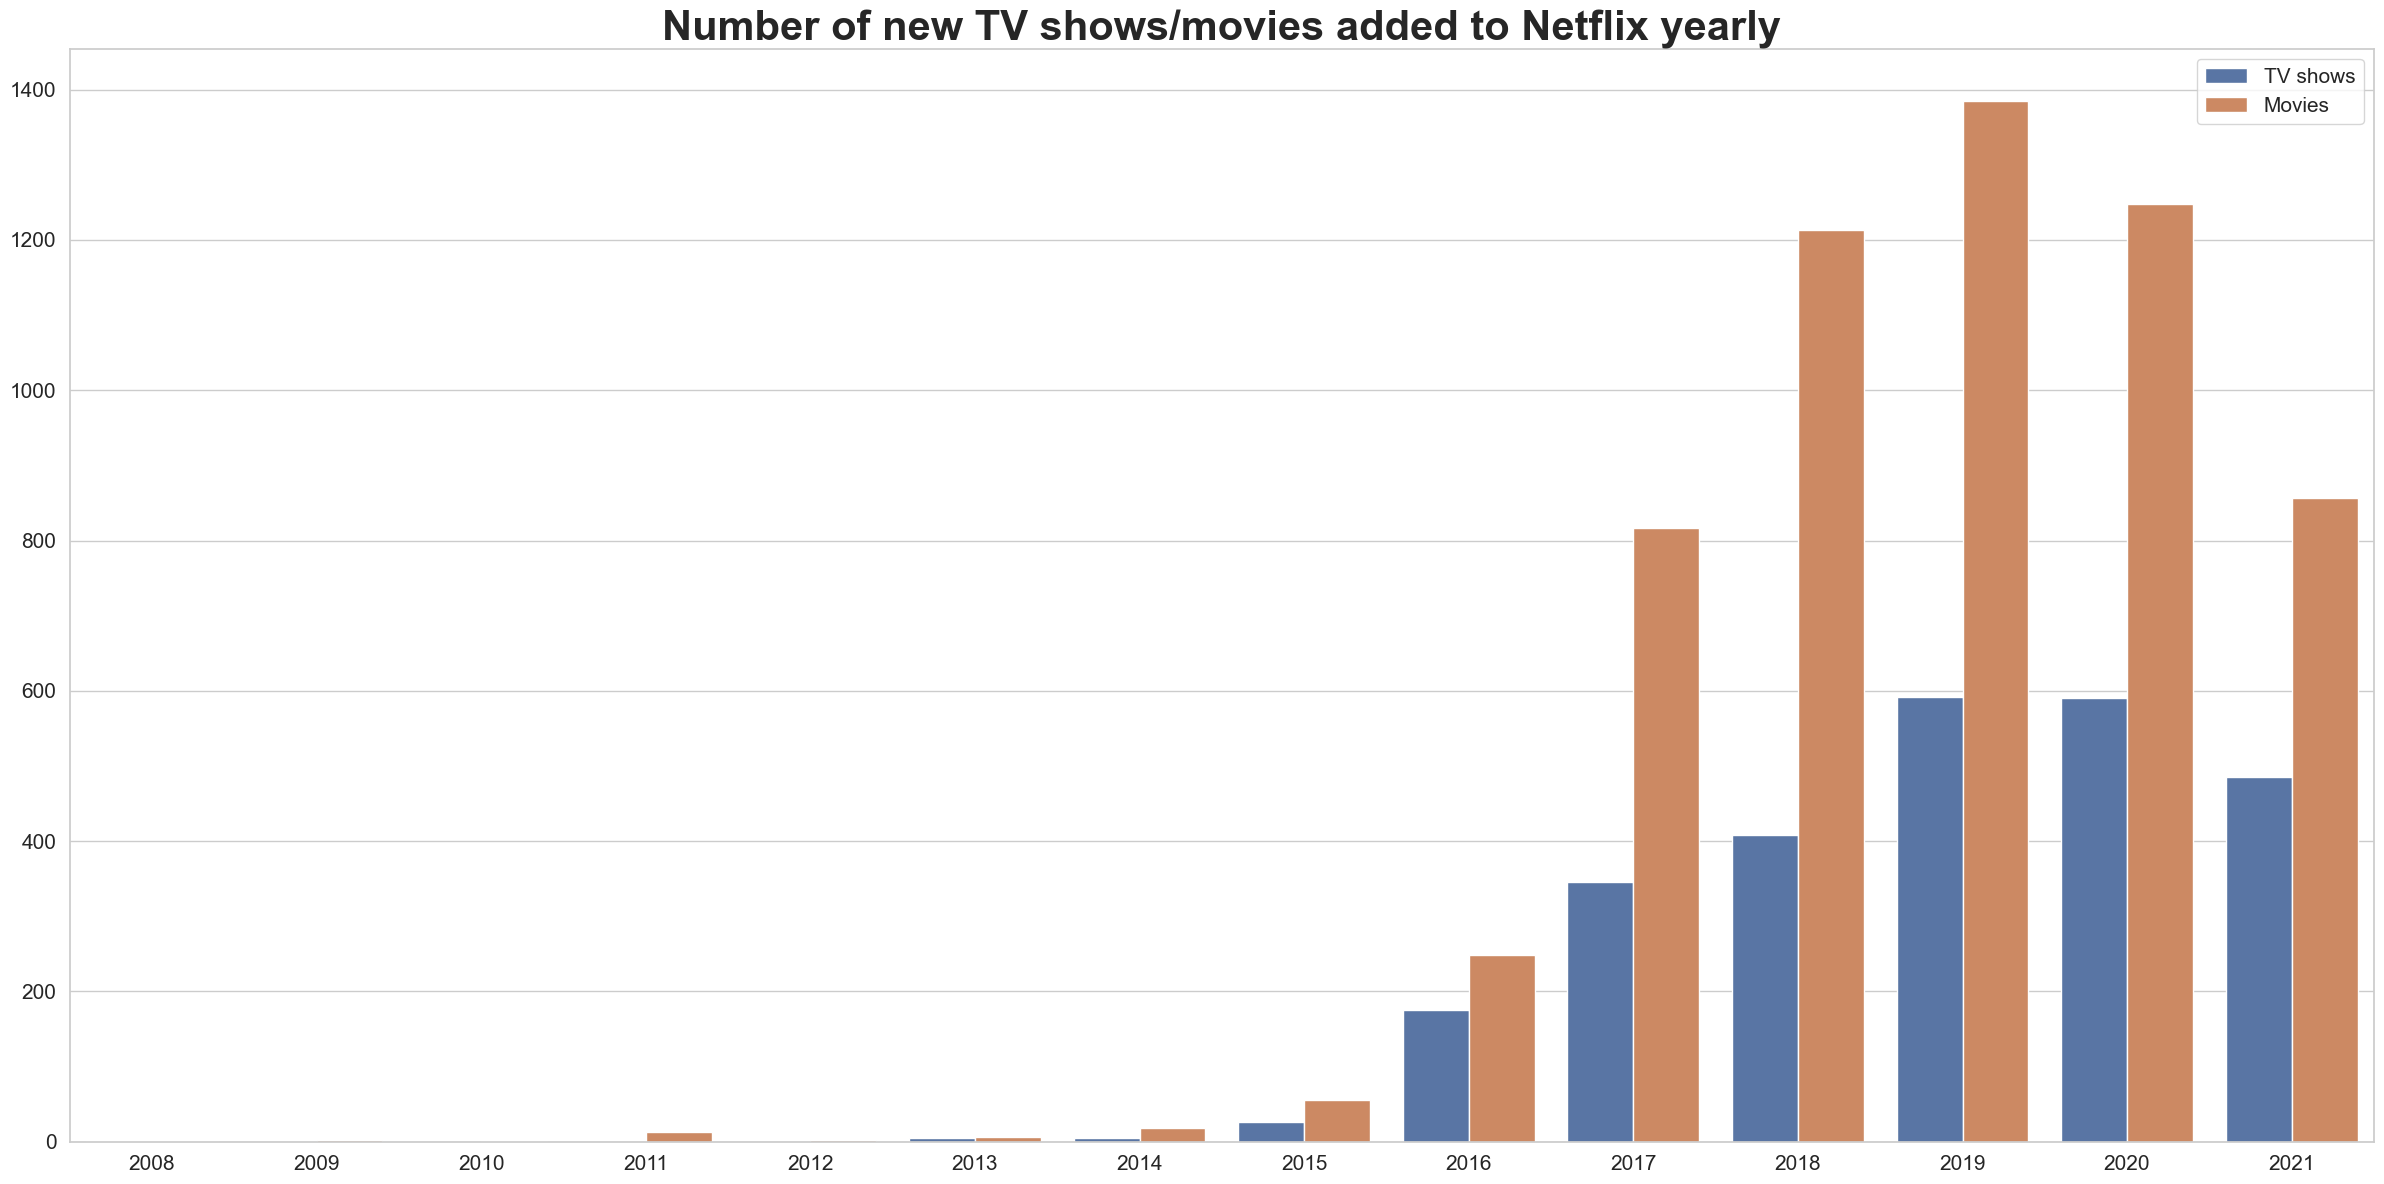

,count,mean,std,min,25%,50%,75%,max
is_movie,,,,,,,,
0,2634.0,2018.911541,1.597851,2008.0,2018.0,2019.0,2020.0,2021.0
1,5869.0,2018.804396,1.551515,2008.0,2018.0,2019.0,2020.0,2021.0


In [160]:
sns.set_theme(style='whitegrid')

ax = plt.subplots(figsize=(24,12))[1]
sns.countplot(data=netflix, x='year_added', hue='is_movie', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Number of new TV shows/movies added to Netflix yearly', fontsize=30, fontweight='bold')
ax.tick_params(labelsize=15)
ax.legend(['TV shows', 'Movies'], fontsize=15)
plt.tight_layout()
plt.show()

netflix.groupby(by='is_movie')['year_added'].describe()

# Observation:
# Most movies added in 2019. Most TV shows added in 2019/2020
# Movies: number of movies added every year exponentially increased until 2019; since then, it significantly decreased
# Shows: number of TV shows added every year gradually increased until 2019; since then, it slightly decreased

In [161]:
print('H0: The number of TV shows and movies added over time are independent')
print('H1: The number of TV shows and movies added over time are dependent\n')

observed_data = netflix.groupby(['year_added', 'is_movie'])['title'].count().reset_index().pivot(index='year_added', columns='is_movie', values='title').fillna(0)
chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(observed_data)

print(f"chi2 stat: {chi2_statistic}")
print(f"p value: {p_value}\n")
if p_value > 0.05:
    print("Fail to reject H0 at the 5% significance level")
    print("We don't have enough evidence to support the dependence of the number of TV shows and movies added over time")
else: 
    print("Reject H0 at the 5% significance level")
    print("We have enough evidence to support the dependence between the number of TV shows and movies added over time")

H0: The number of TV shows and movies added over time are independent
H1: The number of TV shows and movies added over time are dependent

chi2 stat: 77.68112109503923
p value: 3.0054760810212046e-11

Reject H0 at the 5% significance level
We have enough evidence to support the dependence between the number of TV shows and movies added over time


In [162]:
print('H0: The proportion of TV shows in 2019 and 2020 are equal')
print('H1: The proportion of TV shows in 2019 and 2020 are different')
print('Note: The assumption of independent samples is violated\n')

nobs = [netflix.query('year_added == 2019').shape[0], netflix.query('year_added == 2020').shape[0]]
counts = [netflix.query('year_added == 2019 and is_movie == 0').shape[0], netflix.query('year_added == 2020 and is_movie == 0').shape[0]]

z_statistic, p_value = proportions_ztest(counts, nobs, alternative='two-sided', )
print(f"z stat: {z_statistic}")
print(f"p value: {p_value}\n")
if p_value > 0.05:
    print("Fail to reject H0 at the 5% significance level")
    print("We don't have enough evidence to support the difference in the proportions of TV shows between 2019 and 2020")
else: 
    print("Reject H0 at the 5% significance level")
    print("We have enough evidence to support the difference in the proportions of TV shows between 2019 and 2020")

H0: The proportion of TV shows in 2019 and 2020 are equal
H1: The proportion of TV shows in 2019 and 2020 are different
Note: The assumption of independent samples is violated

z stat: -1.4387565666013333
p value: 0.15021950620623573

Fail to reject H0 at the 5% significance level
We don't have enough evidence to support the difference in the proportions of TV shows between 2019 and 2020


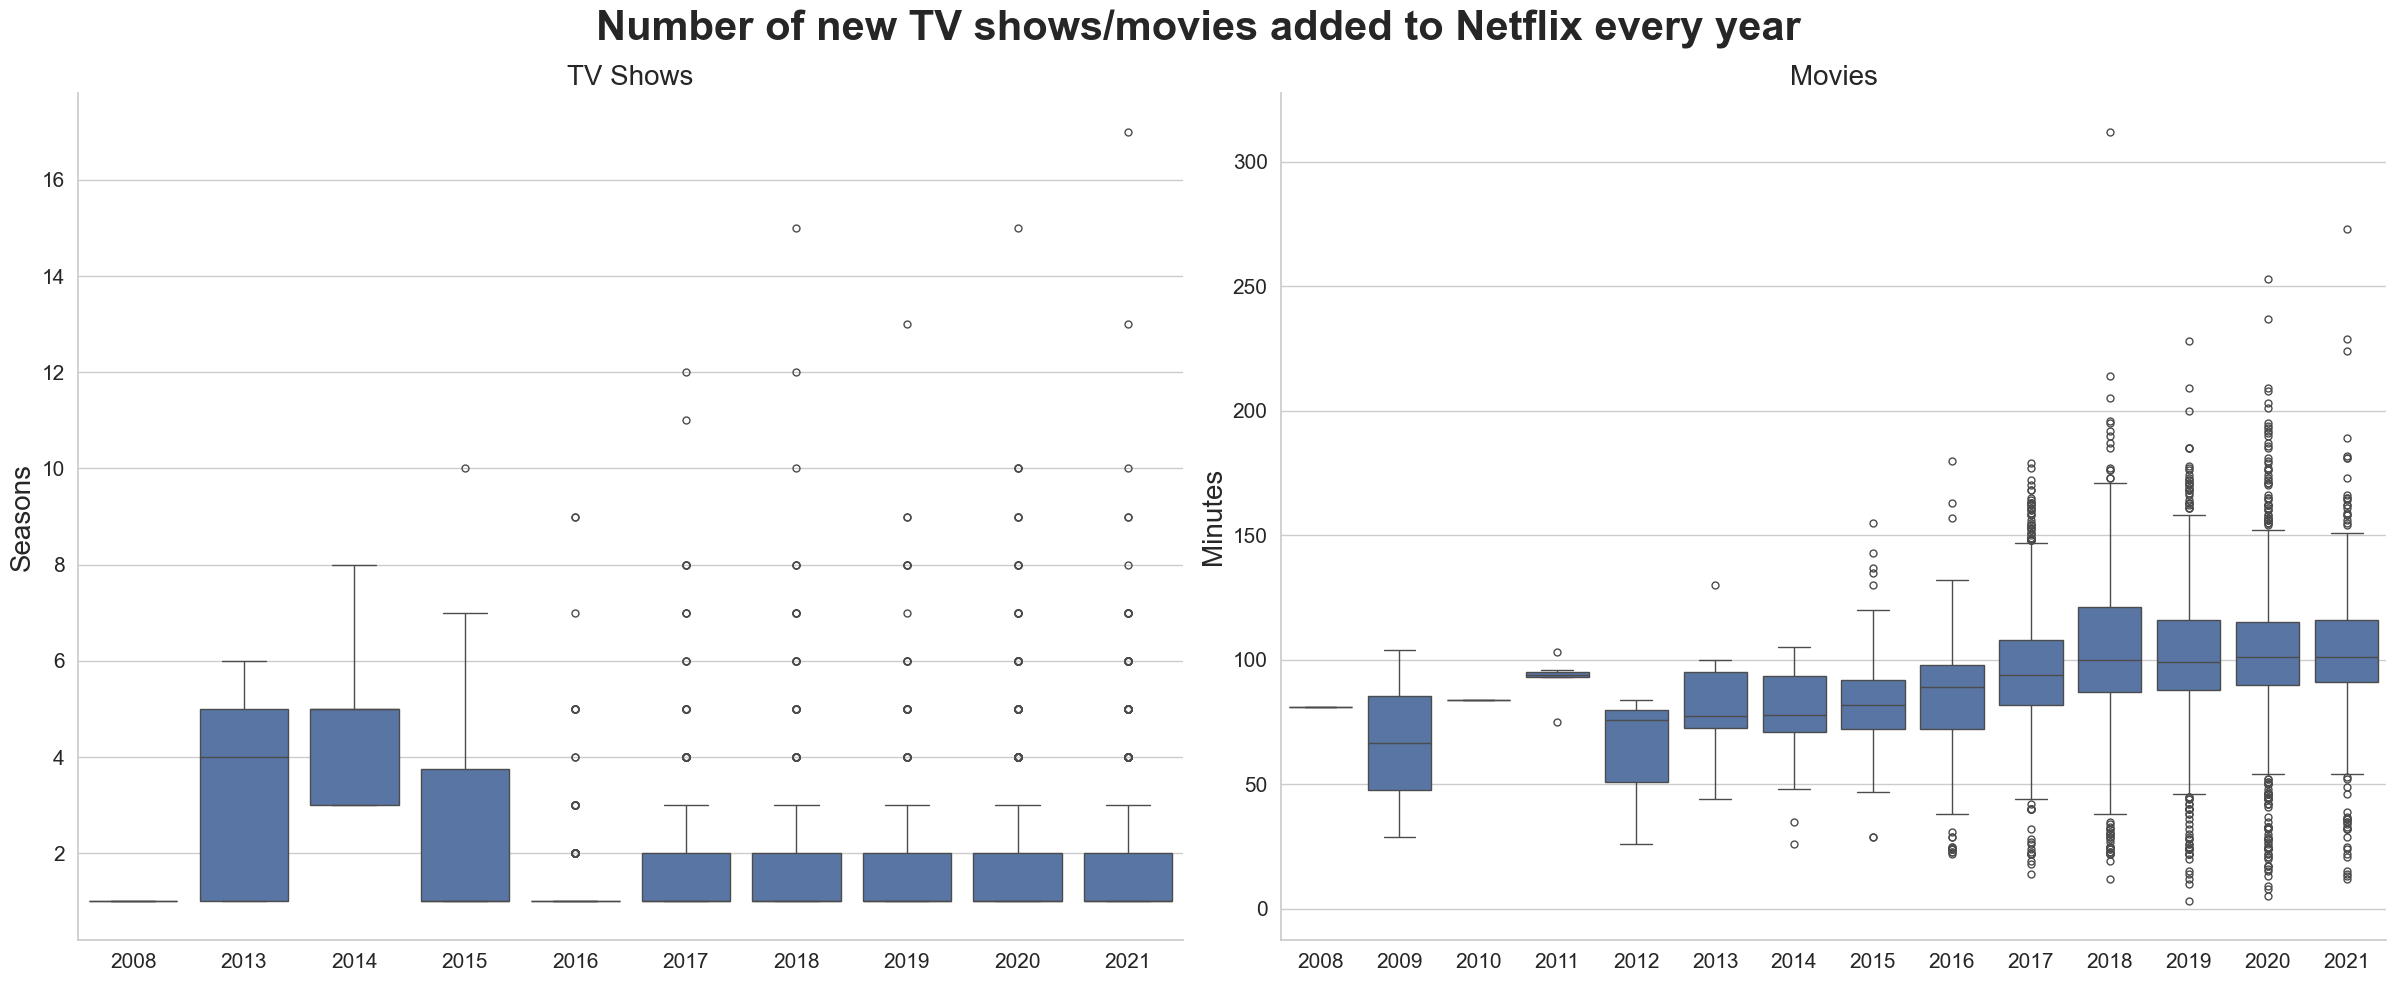

,count,mean,std,min,25%,50%,75%,max
is_movie,,,,,,,,
0,2634.0,1.760061,1.557404,1.0,1.0,1.0,2.0,17.0
1,5869.0,99.894360,27.718281,3.0,87.0,99.0,115.0,312.0


In [163]:
g = sns.catplot(data=netflix, x='year_added', y='duration', col='is_movie', \
            kind='box', sharey=False, sharex=False, height=10, aspect=1.2)

for ax in g.axes.flat:
    ax.set_xlabel('')
    ax.tick_params(labelsize=15)
ax1, ax2 = g.axes.flat
ax1.set_ylabel('Seasons', fontsize=20)
ax1.set_title('TV Shows', fontsize=20)
ax2.set_ylabel('Minutes', fontsize=20)
ax2.set_title('Movies', fontsize=20)
plt.suptitle('Number of new TV shows/movies added to Netflix every year', fontsize=30, fontweight='bold')
plt.tight_layout()
plt.show()

netflix.groupby(by='is_movie')['duration'].describe()

# Observation:
# TV shows: Since 2017, 75% TV shows have 1-2 seasons while some have more than 10 seasons
# Movies: Average duration of movies increased over time until 2018; since then, most movies are 100 minutes. Duration variance increased over time.

In [164]:
top10netflix = netflix[['country']+popular_genres].groupby('country', observed=True).sum().transpose().reset_index().rename(columns={'index': 'genre'})
top10netflix = pd.melt(top10netflix, id_vars='genre', value_name='count').sort_values(['genre', 'count'], ascending=[True, False]).groupby('genre').head(10)
top10netflix['genre'] = top10netflix['genre'].str.title()
top10netflix #top 10 country for each genre in long data format

,genre,country,count
794,Action & Adventure,United States,403
294,Action & Adventure,India,140
784,Action & Adventure,United Kingdom,59
364,Action & Adventure,Japan,54
264,Action & Adventure,Hong Kong,50
...,...,...,...
296,Tv Dramas,India,28
106,Tv Dramas,Canada,25
756,Tv Dramas,Turkey,25
206,Tv Dramas,France,23


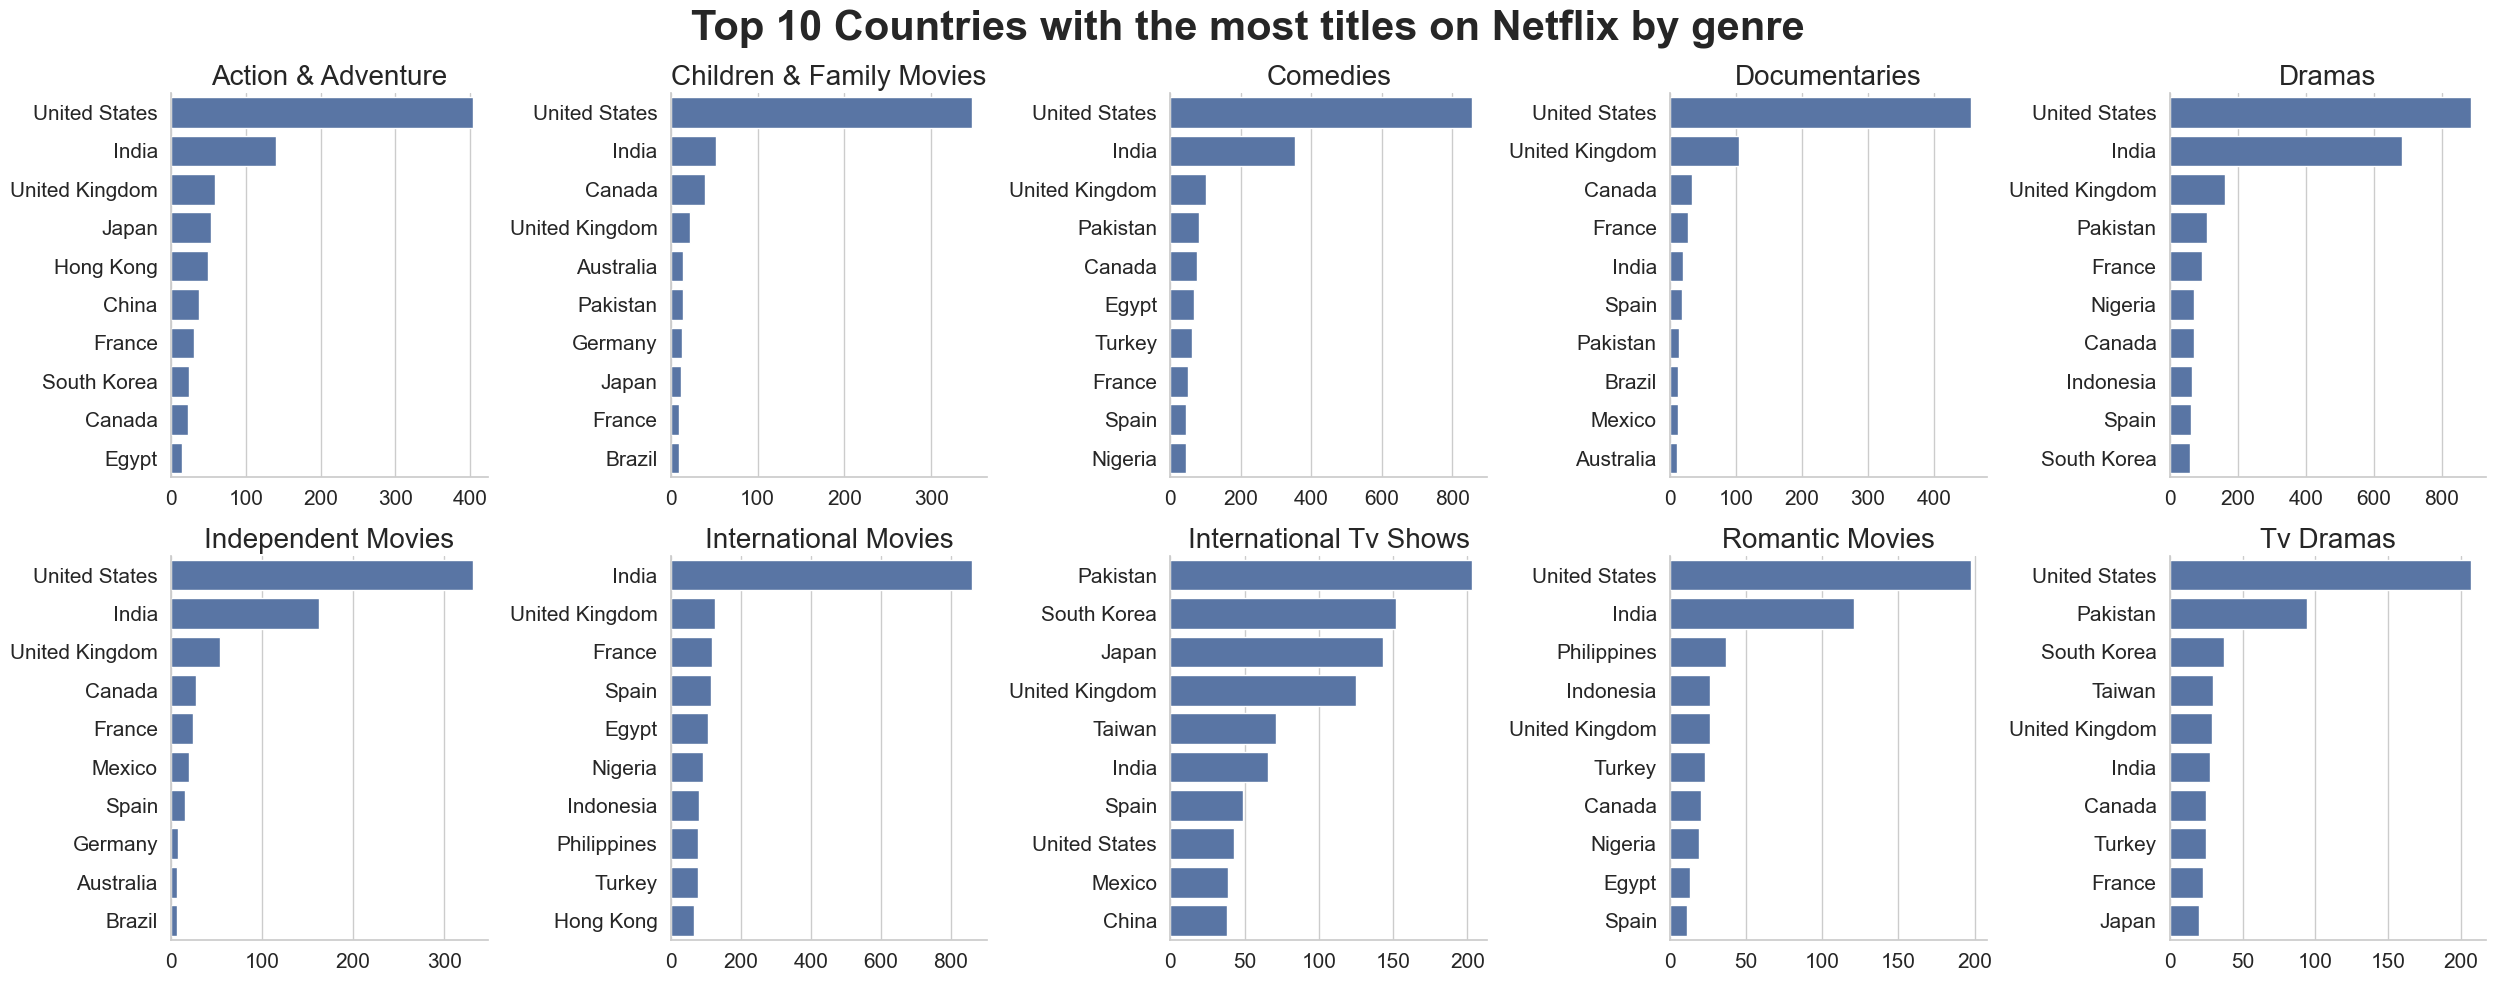

In [165]:
g = sns.catplot(top10netflix, col='genre', col_wrap=5, y='country', x='count', sharex=False, sharey=False, kind='bar')
g.set_titles('{col_name}', size=20)
g.set_axis_labels('', '')
g.tick_params(labelsize=15)
plt.suptitle('Top 10 Countries with the most titles on Netflix by genre', size=30, fontweight='bold')
plt.tight_layout()
plt.show()

# Observation:
# The US outperformed all the other countries for most genres, except international movies/TV shows
# India ranks second for 6/10 genres, including dramas with just under 700 movies/shows. India leads the international movie category at more than 800 movies, creating a significant gap of 700 titles over the second-place UK
# Pakistan, South Korea, and Japan dominate top rankings in international TV shows, while the UK also features prominently in top rankings in some genres, such as documentaries

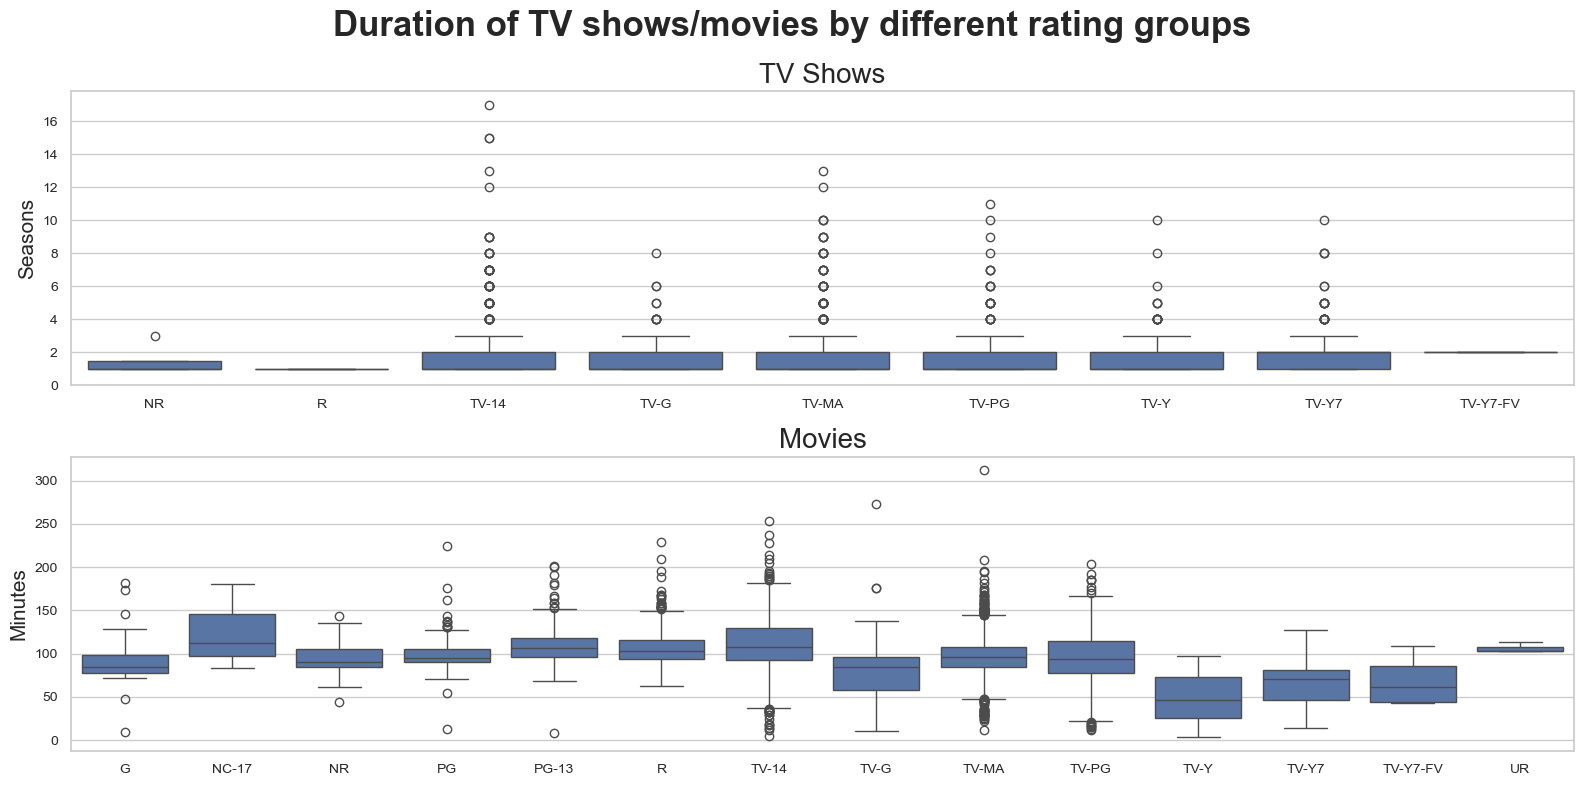

In [166]:
shows = netflix[netflix['is_movie']==0].copy()
shows['rating'] = shows['rating'].cat.remove_unused_categories()

movies = netflix[netflix['is_movie']==1].copy()
movies['rating'] = movies['rating'].cat.remove_unused_categories()

ax = plt.subplots(2, 1, figsize=(16,8), sharex=False)[1]
sns.boxplot(data=shows, x='rating', y='duration', ax=ax[0])
sns.boxplot(data=movies, x='rating', y='duration', ax=ax[1])

ax[0].set_yticks(ticks=range(0,18,2))
ax[0].set_title('TV Shows', size=20)
ax[0].set_xlabel('')
ax[0].set_ylabel('Seasons', size=15)
ax[0].tick_params(labelsize=10)

ax[1].set_title('Movies', size=20)
ax[1].set_xlabel('')
ax[1].set_ylabel('Minutes', size=15)
ax[1].tick_params(labelsize=10)

plt.suptitle('Duration of TV shows/movies by different rating groups', size=25, weight='bold')
plt.tight_layout()
plt.show()

rating_descriptions = {
    # Movie Ratings (MPAA)
    "G": "General Audiences: All ages admitted.",
    "PG": "Parental Guidance Suggested: Some material may not be suitable for children.",
    "PG-13": "Parents Strongly Cautioned: Some material may be inappropriate for children under 13.",
    "R": "Restricted: Under 17 requires accompanying parent or adult guardian.",
    "NC-17": "Adults Only: No one 17 and under admitted.",
    "NR": "Not Rated: No rating information available.",
    "UR": "Unrated: Often used for director's cuts of R-rated films.",

    # TV Ratings
    "TV-Y": "All Children: Designed to be appropriate for all children.",
    "TV-Y7": "Directed to Older Children: Designed for children age 7 and above.",
    "TV-Y7-FV": "Directed to Older Children (Fantasy Violence): May be more intense.",
    "TV-G": "General Audience: Most parents would find this suitable for all ages.",
    "TV-PG": "Parental Guidance Suggested: Contains material parents may find unsuitable for younger children.",
    "TV-14": "Parents Strongly Cautioned: Contains material that may be unsuitable for children under 14.",
    "TV-MA": "Mature Audience Only: Specifically designed to be viewed by adults."
}

# Observation:
# Most TV shows of different groups still have 1-2 seasons while the variance differ by rating groups
# A majority of movies in most groups are 100 minutes long while some rating groups have most movies of only 50 minutes long, such as TV-Y

In [167]:
print('H0: There is no difference in the average duration of TV shows across different rating groups')
print('H1: There is a difference in the average duration of TV shows across different rating groups\n')

model = smf.ols('duration ~ rating', data=shows)
results = model.fit()
anova_table = sm.stats.anova_lm(results)
p_value = anova_table.loc['rating', 'PR(>F)']

if p_value > 0.05:
    print("Fail to reject H0 at the 5% significance level")
    print("We don't have enough evidence to support the difference in the average duration of TV shows across different rating groups")
else: 
    print("Reject H0 at the 5% significance level")
    print("We have enough evidence to support the difference in the average duration of TV shows across different rating groups")

H0: There is no difference in the average duration of TV shows across different rating groups
H1: There is a difference in the average duration of TV shows across different rating groups

Fail to reject H0 at the 5% significance level
We don't have enough evidence to support the difference in the average duration of TV shows across different rating groups


## Part 3: Linear Regression and Logistic Regression

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

In [169]:
def group_small_categories(df, column, threshold=20):
    counts = df[column].value_counts()
    small_cats = counts[counts < threshold].index
    return df[column].astype(str).replace(small_cats, 'Other')

netflix['country_clean'] = group_small_categories(netflix, 'country', threshold=50)
netflix['rating_clean'] = group_small_categories(netflix, 'rating', threshold=50)

In [170]:
netflix_train, netflix_test = train_test_split(netflix, test_size=0.2, random_state=42)
model2 = smf.logit("is_movie ~ country_clean + rating_clean + release_year + year_added", data=netflix_train)
results2 = model2.fit_regularized(method='l1', alpha=1.0)
print(results2.summary2())

c:\Users\Victor\anaconda3\envs\python\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\Victor\anaconda3\envs\python\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.45186518336977954
            Iterations: 387
            Function evaluations: 395
            Gradient evaluations: 387
                                 Results: Logit
Model:                    Logit                 Method:                MLE      
Dependent Variable:       is_movie              Pseudo R-squared:      0.281    
Date:                     2026-01-09 23:37      AIC:                   6133.7175
No. Observations:         6802                  BIC:                   6386.2415
Df Model:                 36                    Log-Likelihood:        -3029.9  
Df Residuals:             6765                  LL-Null:               -4213.8  
Converged:                1.0000                LLR p-value:           0.0000   
No. Iterations:           387.0000              Scale:                 1.0000   
--------------------------------------------------------------------------------
         

c:\Users\Victor\anaconda3\envs\python\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 37 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
c:\Users\Victor\anaconda3\envs\python\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


In [171]:
y_prob = results2.predict(netflix_test)
y_pred = (y_prob > 0.5).astype(int)
y_true = netflix_test['is_movie']

accuracy = accuracy_score(y_true, y_pred)
error = 1 - accuracy

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Error Rate: {error:.4f} (The model is wrong {error*100:.4f}% of the time)")

Test Accuracy: 0.7690
Test Error Rate: 0.2310 (The model is wrong 23.1041% of the time)


In [172]:
movies_train = netflix_train[netflix_train['is_movie']==1]
model3 = smf.ols("duration ~ release_year + year_added + rating_clean + country_clean", data=movies_train)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     84.72
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:37:40   Log-Likelihood:                -21104.
No. Observations:                4690   AIC:                         4.228e+04
Df Residuals:                    4653   BIC:                         4.252e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [173]:
movies_test = netflix_test[netflix_test['is_movie'] == 1]
y_pred = results3.predict(movies_test)
y_true = movies_test['duration']

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.4f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} minutes")

Mean Absolute Error (MAE): 15.2939 minutes
Root Mean Squared Error (RMSE): 20.8626 minutes
